<a href="https://colab.research.google.com/github/TVinh-Nguyen/final-project/blob/main/Wheat_Seeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries and datasets.

In [ ]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
seeds = np.genfromtxt('/content/drive/Shareddrives/wow 2/Python/data/seeds_dataset.txt')
seeds = pd.DataFrame(seeds)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

7
1.0    70
2.0    70
3.0    70
Name: count, dtype: int64


(array([70.,  0.,  0.,  0.,  0., 70.,  0.,  0.,  0., 70.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

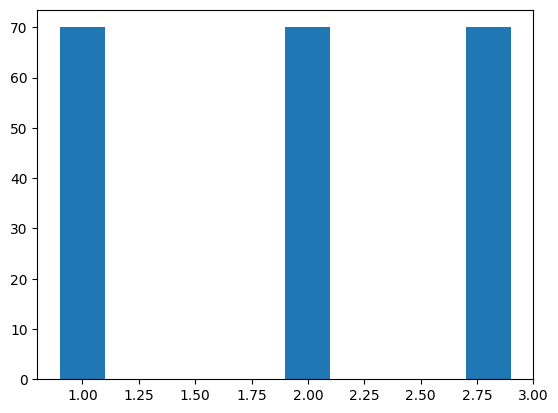

In [ ]:
print(seeds[7].value_counts())
plt.hist(seeds[7], align='left')

In [ ]:
print(seeds.groupby(7).mean())
print(seeds.groupby(7).std())

             0          1         2         3         4         5         6
7                                                                          
1.0  14.334429  14.294286  0.880070  5.508057  3.244629  2.667403  5.087214
2.0  18.334286  16.135714  0.883517  6.148029  3.677414  3.644800  6.020600
3.0  11.873857  13.247857  0.849409  5.229514  2.853771  4.788400  5.116400
            0         1         2         3         4         5         6
7                                                                        
1.0  1.215704  0.576583  0.016191  0.231508  0.177616  1.173901  0.263699
2.0  1.439496  0.616995  0.015500  0.268191  0.185539  1.181868  0.253934
3.0  0.723004  0.340196  0.021760  0.138015  0.147516  1.336465  0.162068


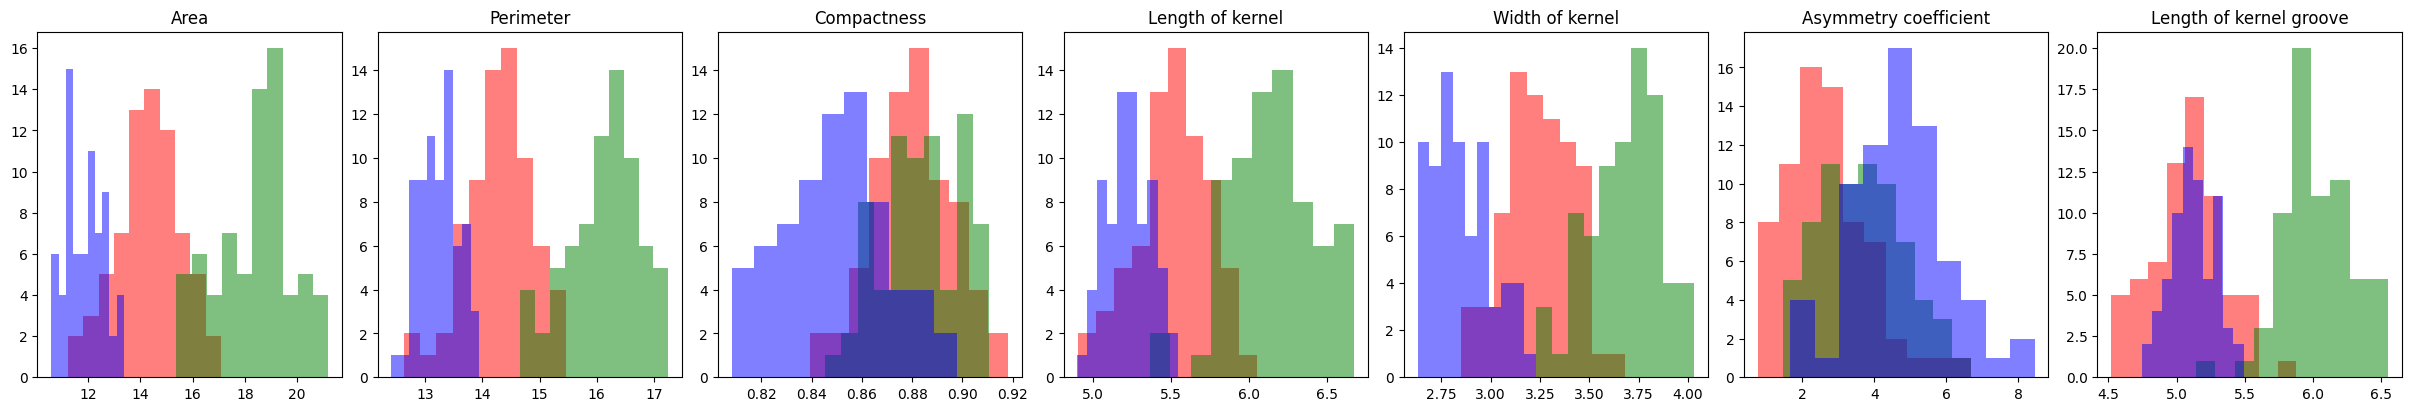

In [ ]:
fig, axs = plt.subplots(1, 7, figsize = (24,4), layout = 'constrained')
features = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove']
for i in range(7):
  axs[i].hist(seeds[seeds[7] == 1][i], alpha = 0.5, color = 'r', label = 'Kama')
  axs[i].hist(seeds[seeds[7] == 2][i], alpha = 0.5, color = 'g', label = 'Rose')
  axs[i].hist(seeds[seeds[7] == 3][i], alpha = 0.5, color = 'b', label = 'Canadian')
  axs[i].set_title(features[i])
  axs[i].legend

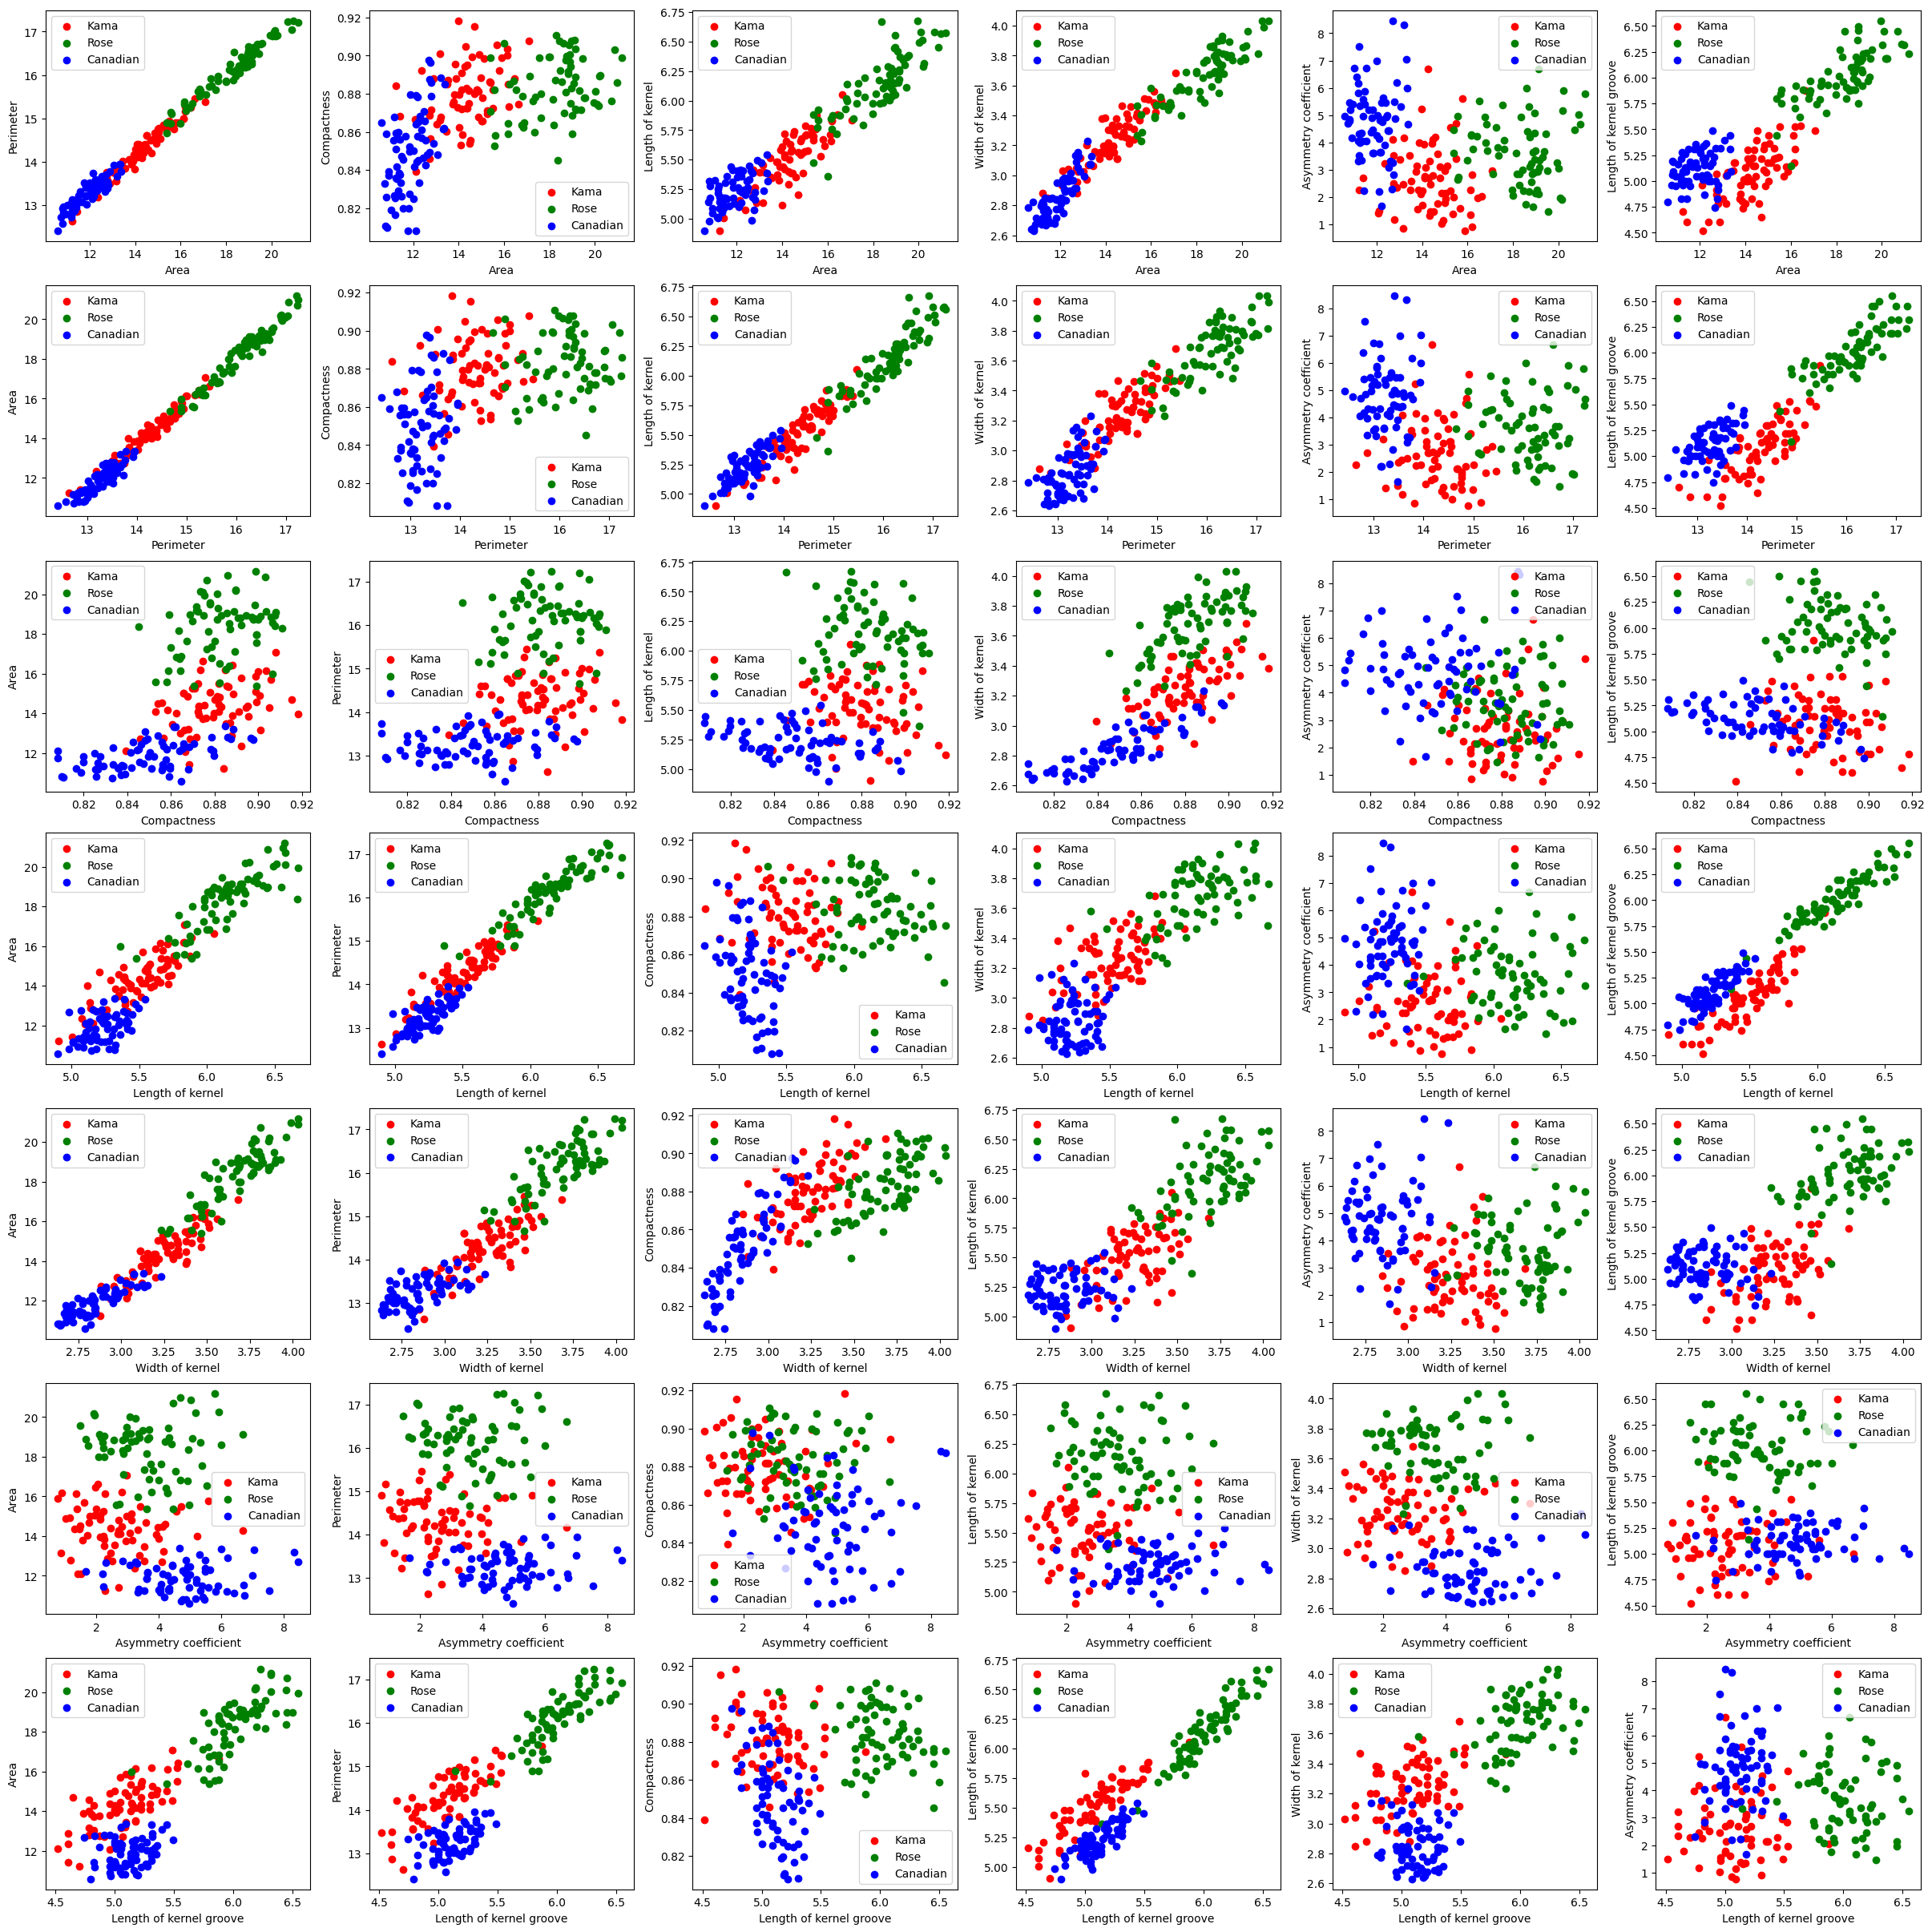

In [ ]:
import matplotlib.pyplot as plt
plt, axs = plt.subplots(7, 6, figsize = (24, 24), layout = 'constrained')
colors = ['r', 'g', 'b']
features = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove']
for i in range(7):
  k = [x for x in range(7) if x != i]
  for j in range(6):
    axs[i,j].scatter(seeds[seeds[7] == 1][i], seeds[seeds[7] == 1][k[j]], color = 'r', label = 'Kama')
    axs[i,j].scatter(seeds[seeds[7] == 2][i], seeds[seeds[7] == 2][k[j]], color = 'g', label = 'Rose')
    axs[i,j].scatter(seeds[seeds[7] == 3][i], seeds[seeds[7] == 3][k[j]], color = 'b', label = 'Canadian')
    axs[i,j].set_xlabel(features[i])
    axs[i,j].set_ylabel(features[k[j]])
    axs[i,j].legend()

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
X, Y = seeds.iloc[:, :7], seeds.iloc[:, 7]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state= 1)

,0,1,2,3,4,5,6
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
151,12.01,13.52,0.8249,5.405,2.776,6.992,5.270
94,18.36,16.52,0.8452,6.666,3.485,4.933,6.448
84,19.51,16.71,0.8780,6.366,3.801,2.962,6.185
193,10.82,12.83,0.8256,5.180,2.630,4.853,5.089
...,...,...,...,...,...,...,...
203,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
137,15.57,15.15,0.8527,5.920,3.231,2.640,5.879
72,17.26,15.73,0.8763,5.978,3.594,4.539,5.791
140,13.07,13.92,0.8480,5.472,2.994,5.304,5.395


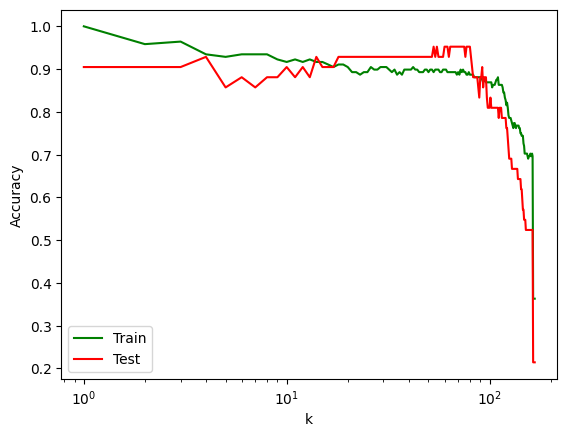

Best k: 53 
Test Accuracy:0.9523809523809523
Train Accuracy:0.8928571428571429


In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
k_values = list(range(1, len(X_train)))
train_score = [None] * len(k_values)
test_score = [None] * len(k_values)
for i, k in enumerate(k_values):
  wheat_wizard = KNeighborsClassifier(n_neighbors = k)
  wheat_wizard.fit(X_train, Y_train)
  train_score[i] = wheat_wizard.score(X_train, Y_train)
  test_score[i] = wheat_wizard.score(X_test, Y_test)
plt.semilogx(k_values, train_score, color = 'g', label = 'Train')
plt.semilogx(k_values, test_score, color = 'r', label = 'Test')
plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()
print(f'Best k: {k_values[np.argmax(test_score)]} \nTest Accuracy:{test_score[np.argmax(test_score)]}\nTrain Accuracy:{train_score[np.argmax(test_score)]}')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
wheat_wizard = GaussianNB()
wheat_wizard.fit(X_train, Y_train)
print(f'Train Accuracy: {wheat_wizard.score(X_train, Y_train)}')
print(f'Test Accuracy: {wheat_wizard.score(X_test, Y_test)}')

Train Accuracy: 0.9047619047619048
Test Accuracy: 0.9285714285714286


## For KNN classifier, k=53 is optimal and provides test accurary of ~.95.

## For Naive Bayes, test accuracy is ~.93.